# Importing Pokemon data from PokeAPI.co

In [56]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
api_url_base = "https://pokeapi.co/api/v2/pokemon-species/"

There are 807 pokemons.

In [45]:
json_data_list = []
for i in range(807):
    response = requests.get(api_url_base + str(i))
    if response.status_code == 200:
        json_data = json.loads(response.content.decode('utf-8'))
    else:
        print(f"Could not retrieve pokemon nr: {i}")
    json_data_list.append(json_data)

all_pokemons = json.dumps(json_data_list)

Could not retrieve pokemon nr: 0


In [51]:
len(json_data_list)

807

In [43]:
with open('pokemons.json', 'w', encoding='utf-8') as f:
    json.dump(all_pokemons, f, ensure_ascii=False, indent=4)

# Looking at our data

In [70]:
genuses = []
for pokemon in json_data_list:
    genuses.append(pokemon["genera"][2]["genus"])

In [71]:
unique_gen, counts_gen = np.unique(genuses, return_counts=True)

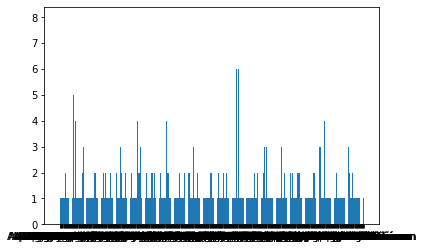

In [73]:
x = np.arange(len(unique_gen))
fig, ax = plt.subplots()
plt.bar(x, counts_gen)
plt.xticks(x, unique_gen)
plt.show()

Seems like there are a lot of genuses. The relationships between the genuses I do not know.

In [82]:
len(unique_gen)

588

In [74]:
egg_groups = []
for pokemon in json_data_list:
    egg_groups.append(pokemon["egg_groups"][0]["name"])

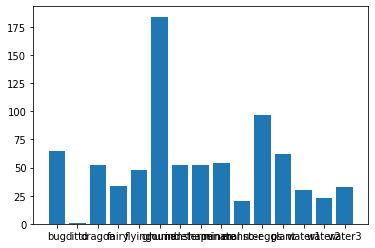

In [76]:
x = np.arange(len(unique_egg))
fig, ax = plt.subplots()
plt.bar(x, counts_egg)
plt.xticks(x, unique_egg)
plt.show()

In [79]:
unique_egg, counts_egg = np.unique(egg_groups, return_counts=True)
print(dict(zip(unique_egg, counts_egg)))

{'bug': 65, 'ditto': 1, 'dragon': 52, 'fairy': 34, 'flying': 48, 'ground': 184, 'humanshape': 52, 'indeterminate': 52, 'mineral': 54, 'monster': 20, 'no-eggs': 97, 'plant': 62, 'water1': 30, 'water2': 23, 'water3': 33}


# Results
<img src="img/Linnaeus.png" width="200">
If we choose Linnaeus' system of classification we place a pokemon in an hiarchy og biological classification as follows:
Kingdom - Animalia, Plantae, Fungi, Protista etc <br>
Phylum - Group of organisms with common traits <br>
Class - Level of complexity to the layout of the organ system. (fish, birds, mammals etc) <br>
Order - Grouping families with common ansestors based on their kinship. (primates etc) <br>
Family - Used for evolutionary studies to group genuses. <br>
Genus  - A group with direct offspring to eachother. (<i>to give birth to</i>) (Alaskian husky and Siberian Husky has same genus) <br>
Species - The basic unit of classification. One distinct type of living creature. <br>
<br>
Example: 
Man aka Homo Sapiens has the following classification:

| Classification | example|
| --------- | ---------- |
|Kingdom	|Animalia    |
|Phylum	    |Chordata    |
|Class	    |Mammalia    |
|Order	    |Primates    |
|Family	    |Hominidae   |
|Genus	    |Homo        |
|Species	|Homo sapiens|

Illustrated example:
<img src="img/dog_classification.png" width="80%">

After looking at available data we will have to be creative as we only have egg groups and genus. 

Our proposed solution is:

| Classification |              Pokemon                           |
| -------------- | ----------------------------------------       |
|Kingdom	     |Separate Egg Groups on Plants, Animals, Mineral |
|Phylum	         |Separate Bugs from Animals                      |
|Class	         |Separate Animals on Flying, Water, Dragon, Fairy|
|Order	         |-------------                                   |
|Family	         |-------------                                   |
|Genus	         |Pokemon Genus                                   |
|Species	     |Pokemon name                                    |

